ASSIGNMENT - 5


S.Lakshmi Praveen

21bec7266

VIT - AP

In [6]:
#Task 1

import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
print("\n Displaying first few rows in dataset:\n")
print(df.head())
print("\n Displaying basic statistics for numerical columns:\n")
print(df.describe())
print("\n Displaying information about the dataframe, including data types and missing values:\n")
print(df.info())
print("\n Displaying the count of number of unique values in each columns:\n")
print(df.nunique())
print("\n checking for missing values in each columns:\n")
print(df.isnull().sum())


 Displaying first few rows in dataset:

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

 Displaying basic statistics for numerical columns:

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000      

In [10]:
#Task 2

import pandas as pd
df.dropna(inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df[['Age','Annual Income (k$)','Spending Score (1-100)']]=scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
from sklearn.model_selection import train_test_split
X= df.drop('Spending Score (1-100)', axis=1)
y= df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
df.to_csv('preprocessed_dataset.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

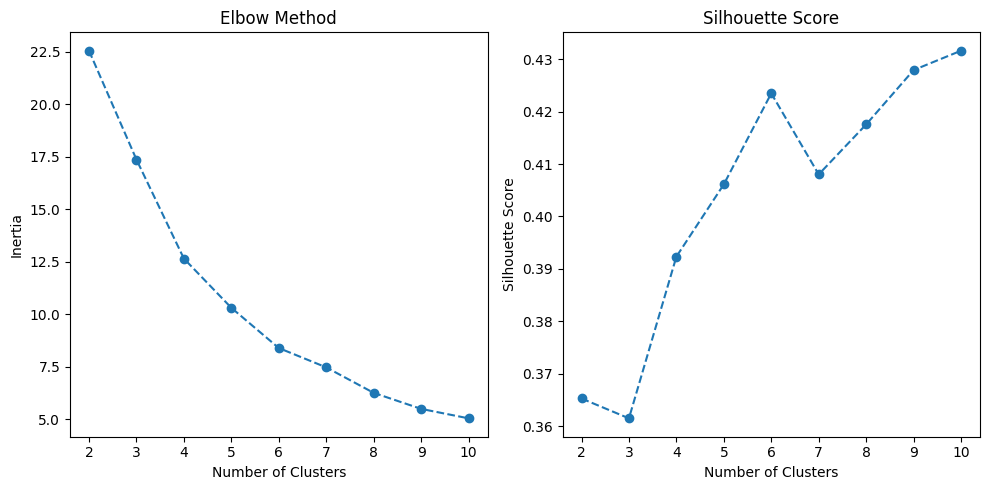

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


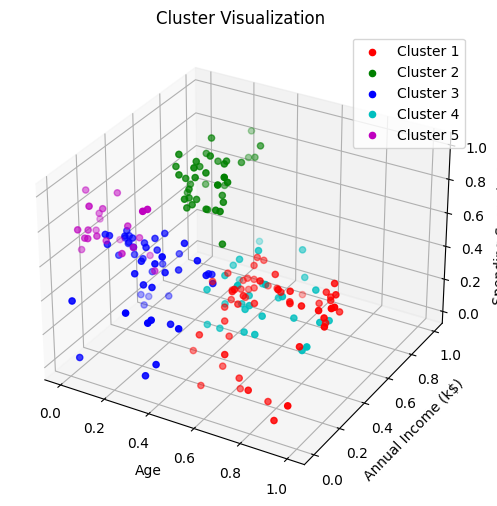

Silhouette Score: 0.41


In [11]:
from pandas.core.indexes.datetimelike import inherit_names
#Task 3

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X= df[['Age','Annual Income (k$)','Spending Score (1-100)']]
inertia=[]
silhouette_scores=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(X, kmeans.labels_))
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(2,11),inertia, marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(1,2,2)
plt.plot(range(2,11),silhouette_scores, marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.tight_layout()
plt.show()

kmeans= KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df['Cluster']=kmeans.labels_
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')
colors = ['r','g','b','c','m']
for i, cluster in enumerate(range(5)):
  cluster_data = df[df['Cluster'] == cluster]
  ax.scatter(cluster_data['Age'],cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],c=colors[i], label=f'Cluster {cluster + 1}')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Cluster Visualization')
plt.legend()
plt.show()

silhouette_avg=silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')